# Exercises 5: STC/GLM ##

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate

(a) Create the filters from 0ms to 20ms with a bin size of 1ms. Also, normalize the filter amplitudes
by numpy.linalg.norm.

In [3]:
def filter_a(t):
    result = np.exp((-(t - 10) ** 2) / 10) * np.cos(2 * np.pi * (t - 10) / 10)
    return result

def filter_b(t):
    result = np.exp((-(t - 10) ** 2) / 10) * np.cos((2 * np.pi * (t - 10) / 10) + (np.pi / 2))
    return result

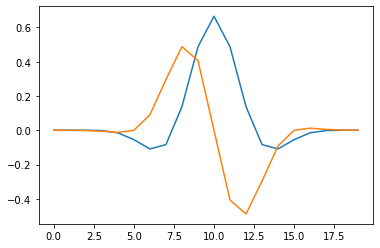

In [4]:
ts = 1
t = np.arange(0, 20, ts)

a = filter_a(t) / np.linalg.norm(filter_a(t))
b = filter_b(t) / np.linalg.norm(filter_b(t))

plt.plot(t, a)
plt.plot(t, b)

b) Generate a white noise stimulus x(t) for 100s with a bin size of 1ms.

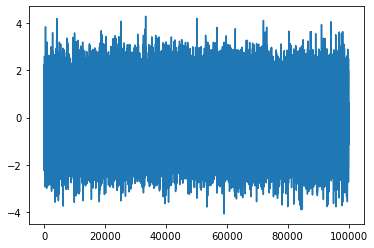

In [6]:
t_x = np.arange(0, 100000, 1)
x = np.random.normal(size = 100000)

plt.plot(t_x, x)

(c) Consider a neural system which takes x(t) as input and produce an output r(t) with a squaring nonlinearity by

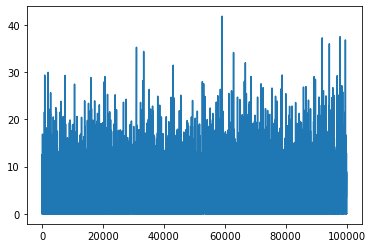

In [7]:
n_filter = len(a)
x_padded = np.hstack((n_filter-1, x))

r = 2 * (np.convolve(x_padded, a, mode='valid') ** 2) + 1.5 * (np.convolve(x_padded, b, mode='valid') ** 2)

plt.plot(t_x, r)

(d) The output r(t) is firing rate. Consider an inhomogeneous poisson process with instantaneous firing rate of r(t). Sample a spike train from this process until 100s.

In [136]:
def inhomogeneous_poission(N, T, r, ts = 1):
    t_all_trials = []

    for i_trial in range(N):
        left_expression = np.nan
        m = i_trial + 1
        t_trial = [0]

        t = 0
        right_expression = 0
        
        while t_trial[-1] <= T:
            u = np.random.rand()

            if np.isnan(left_expression):
                left_expression = -np.log(1-u)
            else:
                left_expression += -np.log(1-u)

            while left_expression > right_expression:
                right_expression = np.trapz(r[:t])
                
                if left_expression > right_expression:
                    t += ts

            if t > T:
                break
            else
                t_trial.append(t)
        t_trial.pop(0)
        t_all_trials.append(t_trial)
    return t_all_trials

In [153]:
N = 1
T = 90000

s = inhomogeneous_poission(1, T, r, ts)

In [181]:
count = np.zeros((T))

for i in s[0]:
    count[i-1] = count[i-1] + 1

In [184]:
count[:100]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  5.,  7.,  7.,  5.,
        3.,  5.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  4.,  1.,  9.,  1.,
        4.,  1.,  0.,  1.,  1.,  3.,  0.,  2.,  0.,  3.,  5.,  2.,  1.,
        1.,  0.,  2.,  6.,  3.,  5.,  2.,  3.,  1.,  5.,  5.,  5.,  3.,
        4.,  5.,  7.,  7.,  1.,  7.,  3.,  2.,  3.,  9.,  4.,  7.,  6.,
       18., 18., 10.,  5.,  5.,  4.,  3.,  4.,  6.,  8.,  5.,  0.,  2.,
        4.,  3.,  1.,  3.,  2.,  2.,  0.,  1.,  1.,  2.,  3.,  3.,  5.,
        3.,  4.,  4.,  8., 11., 14.,  5.,  5.,  4.])

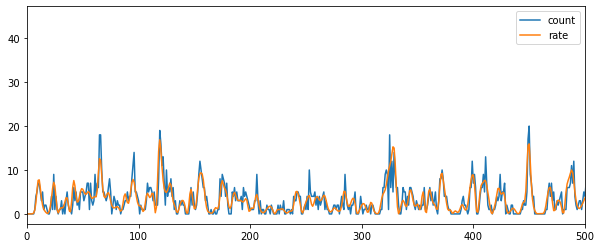

In [194]:
plt.figure(figsize=(10,4))
plt.plot(count, label='count')
plt.plot(r, label='rate')
plt.xlim(0, 500)
plt.legend()

(e) Compute the spike-triggered average (STA) up to $N_{filter}$ time bins before the spikes.

In [196]:
window = n_filter

all_spikes_idx = np.where(count > 0)
spikes_idx = all_spikes_idx[0][all_spikes_idx[0]>n_filter]
spikes_counts = count[spikes_idx]

snippets_idx = np.zeros((len(spikes_idx), window)).astype('int')
for i in range(len(spikes_idx)):
    snippets_idx[i, :] = list(range((spikes_idx[i]-window),(spikes_idx[i])))


stimuli_snippets = np.zeros((len(spikes_idx), window))
for i in range(len(spikes_idx)):
    stimuli_snippets[i, :] = x[snippets_idx[i, :]]

sta_weighted = np.average(stimuli_snippets, axis = 0, weights = spikes_counts.flatten())

Text(0.5, 1.0, 'STA')

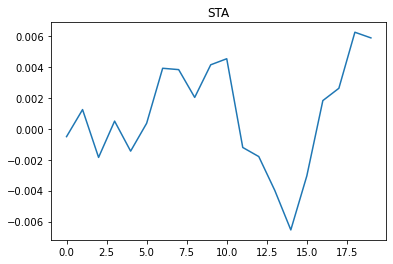

In [207]:
t_window = np.arange(0, n_filter, ts)

plt.plot(t_window, sta_weighted)
plt.title('STA')

(f) Compute the spike-triggered covariance (STC).

In [ ]:
xi = x[]